# A generic notebook to compare experiments metrics

_To run this notebook which loads methods from other local folders, add the src path to the Python path by modifying the environment activation script if you use a virtual environment, or adding it manually in the cell below otherwise._

In [37]:
# #The following lines load the module repository is not added to your python path
# import os
# import sys
# src_path = os.path.abspath(os.path.join('..', 'src'))
# if src_path not in sys.path:
#     sys.path.append(src_path)

In [ ]:
from pathlib import Path
import os
import matplotlib.pyplot as plt

from Results.metrics_statistics import plot_metrics_stats, print_metrics_stat, plot_silhouette_stats
from Results.plot_metrics import load_metrics, plot_metrics_by_exp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
exp_folder = Path(os.path.abspath(os.path.join('..', 'experiments')))

colors40 = ['red', 'orange', 'green', 'blue', 'indigo', 'violet', 'brown', 'pink', 'gray', 'olive', 'cyan', 'navy', 'teal', 'maroon', 'silver', 'tan', 'gold', 'purple', 'yellow', 'moccasin', 'bisque', 'wheat', 'peachpuff', 'navajowhite', 'salmon', 'crimson', 'palevioletred', 'darksalmon', 'lightcoral', 'hotpink', 'palegoldenrod', 'plum', 'darkkhaki', 'orchid', 'thistle', 'lightgray', 'lightgreen', 'lightblue', 'lightskyblue', 'lightyellow', 'lavender', 'linen']

In [63]:
experiments_tripletAE = {
    "Triplet": exp_folder/"Exp_Triplet_noTest",
    "1.AE + 1e-7.triplet": exp_folder/"Exp_TripletAE_a1_b1e-7",
    "1.AE + 1e-5.triplet": exp_folder/"Exp_TripletAE_a1_b1e-5",
    "1.AE + 1e-4.triplet": exp_folder/"Exp_TripletAE_a1_b1e-4",
    "1.AE + 1e-3.triplet": exp_folder/"Exp_TripletAE_a1_b1e-3",
    "1.AE + 5e-3.triplet": exp_folder/"Exp_TripletAE_a1_b5e-3",
    "1.AE + 1e-2.triplet": exp_folder/"Exp_TripletAE_a1_b1e-2",
    "1.AE + 5e-2.triplet": exp_folder/"Exp_TripletAE_a1_b5e-2",
    "1.AE + 1e-1.triplet": exp_folder/"Exp_TripletAE_a1_b0-1",
    "1.AE + 1.triplet": exp_folder/"Exp_TripletAE_a1_b1",
    "AE": exp_folder/"Exp_ConvAE_400ms_noTest",
}

experiments_test = {
    "exp test": exp_folder/"Exp_ConvAE_test"
}

experiments_tripletAE_weights = {
    1e-7: "1.AE + 1e-7.triplet",
    1e-5: "1.AE + 1e-5.triplet",
    1e-4: "1.AE + 1e-4.triplet",
    1e-3: "1.AE + 1e-3.triplet",
    5e-3: "1.AE + 5e-3.triplet",
    1e-2: "1.AE + 1e-2.triplet",
    5e-2: "1.AE + 5e-2.triplet",
    1e-1: "1.AE + 1e-1.triplet",
    1.: "1.AE + 1.triplet",
}

exp_colors = {
    "AE": colors40[1],
    "1.AE + 1e-7.triplet": colors40[10],
    "1.AE + 1e-5.triplet": colors40[11],
    "1.AE + 1e-4.triplet": colors40[12],
    "1.AE + 1e-3.triplet": colors40[13],
    "1.AE + 5e-3.triplet": colors40[14],
    "1.AE + 1e-2.triplet": colors40[15],
    "1.AE + 5e-2.triplet": colors40[16],
    "1.AE + 1e-1.triplet": colors40[17],
    "1.AE + 1.triplet": colors40[18],
    "triplet": colors40[6],
    
    "exp_test": colors40[0]
}

split = "all"

### Load metrics from all runs

In [65]:
# metrics = load_metrics(experiments_tripletAE, split)
metrics = load_metrics(experiments_test, split)
print(metrics)

defaultdict(<class 'list'>, {'exp test': [{'mse': 0.04791673645377159, 'categorycontinuity_pos_latent_k5_aggregationtotal-mean': 0.5818181818181818, 'categorycontinuity_pos_2d_k5_aggregationtotal-mean': 0.5454545454545454, 'categorycontinuity_class_latent_k5_aggregationtotal-mean': 1.0, 'categorycontinuity_class_2d_k5_aggregationtotal-mean': 1.0, 'categorycontinuity_detailed_latent_k5_aggregationtotal-mean': 0.5818181818181818, 'categorycontinuity_detailed_2d_k5_aggregationtotal-mean': 0.5454545454545454}, {'mse': 0.05128343030810356, 'categorycontinuity_pos_latent_k5_aggregationtotal-mean': 0.4727272727272727, 'categorycontinuity_pos_2d_k5_aggregationtotal-mean': 0.509090909090909, 'categorycontinuity_class_latent_k5_aggregationtotal-mean': 1.0, 'categorycontinuity_class_2d_k5_aggregationtotal-mean': 1.0, 'categorycontinuity_detailed_latent_k5_aggregationtotal-mean': 0.4727272727272727, 'categorycontinuity_detailed_2d_k5_aggregationtotal-mean': 0.509090909090909}, {'mse': 0.0467221513

## Plots

In [66]:
k_category_continuity = 5
metric_det_lat = f"categorycontinuity_detailed_latent_k{k_category_continuity}_aggregationtotal-mean"
metric_det_2D = f"categorycontinuity_detailed_2d_k{k_category_continuity}_aggregationtotal-mean"
metric_type_lat = f"categorycontinuity_class_latent_k{k_category_continuity}_aggregationtotal-mean"
metric_type_2D = f"categorycontinuity_class_2d_k{k_category_continuity}_aggregationtotal-mean"
metric_pos_lat = f"categorycontinuity_pos_latent_k{k_category_continuity}_aggregationtotal-mean"
metric_pos_2D = f"categorycontinuity_pos_2d_k{k_category_continuity}_aggregationtotal-mean"

mse = "mse"

metric_colors = {
    metric_pos_lat: 'blue', 
    metric_pos_2D: 'dodgerblue', 
    metric_type_lat : 'darkgreen', 
    metric_type_2D:'limegreen', 
    metric_det_lat : 'red', 
    metric_det_2D:'orange',
    mse: "gray"
    }

Means exp test {'categorycontinuity_class_latent_k5_aggregationtotal-mean': array([1.]), 'categorycontinuity_class_2d_k5_aggregationtotal-mean': array([1.])}
Means exp test {'categorycontinuity_detailed_latent_k5_aggregationtotal-mean': array([0.52363636]), 'categorycontinuity_detailed_2d_k5_aggregationtotal-mean': array([0.53090909])}
Means exp test {'categorycontinuity_pos_latent_k5_aggregationtotal-mean': array([0.52363636]), 'categorycontinuity_pos_2d_k5_aggregationtotal-mean': array([0.53090909])}


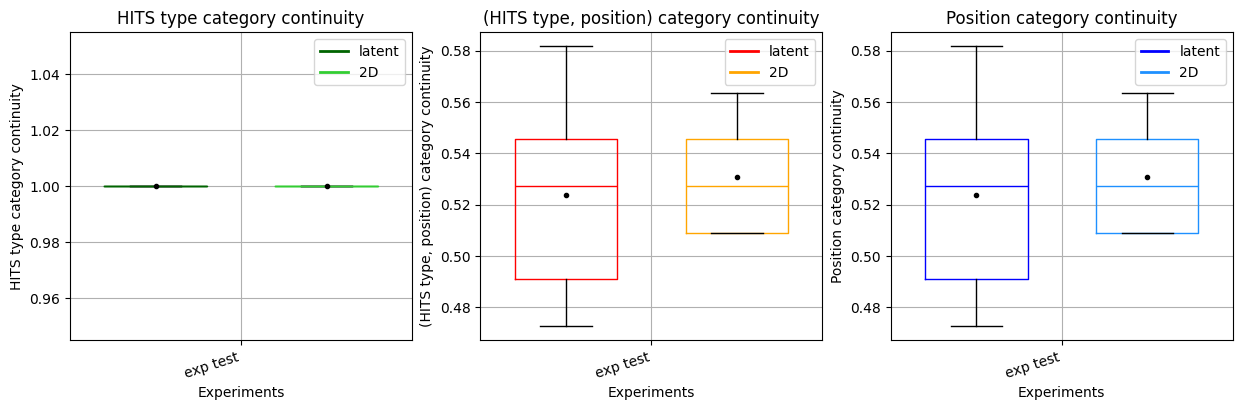

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plot_metrics_by_exp(axs[0], metrics, 
                    [metric_type_lat, metric_type_2D], metric_colors, 
                    y_label = "HITS type category continuity",
                    title = "HITS type category continuity",
                    legend_names = ["latent", "2D"])
plot_metrics_by_exp(axs[1], metrics, 
                    [metric_det_lat, metric_det_2D], metric_colors, 
                    y_label = "(HITS type, position) category continuity",
                    title = "(HITS type, position) category continuity",
                    legend_names = ["latent", "2D"])
plot_metrics_by_exp(axs[2], metrics, 
                    [metric_pos_lat, metric_pos_2D], metric_colors, 
                    y_label = "Position category continuity",
                    title = "Position category continuity",
                    legend_names = ["latent", "2D"])
plt.show()

Means exp test {'mse': array([0.04963093])}


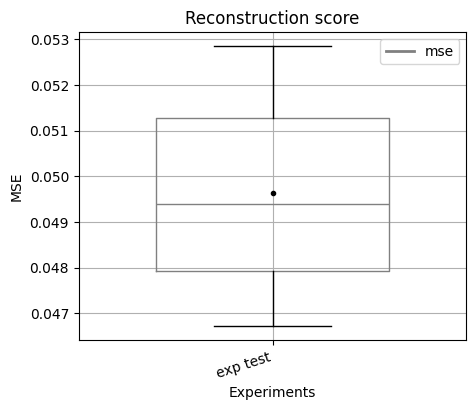

In [69]:
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
plot_metrics_by_exp(axs, metrics, 
                    [mse], metric_colors, 
                    y_label = "MSE",
                    title = "Reconstruction score")